In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('training.csv',sep=',',decimal='.')
test=pd.read_csv('test.csv',sep=',',decimal='.')



In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
Unnamed: 0                     576 non-null int64
Months since Last Donation     576 non-null int64
Number of Donations            576 non-null int64
Total Volume Donated (c.c.)    576 non-null int64
Months since First Donation    576 non-null int64
Made Donation in March 2007    576 non-null int64
dtypes: int64(6)
memory usage: 27.1 KB


In [4]:
test.isnull().sum()

Unnamed: 0                     0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
dtype: int64

In [5]:
X=train.drop(labels='Unnamed: 0',axis=1)

In [6]:
train['Made Donation in March 2007'].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

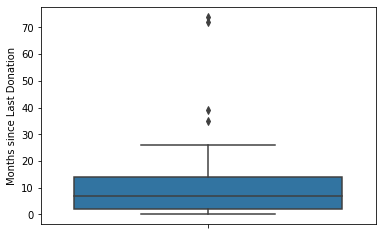

In [79]:
sns.boxplot(data=train, y='Months since Last Donation')

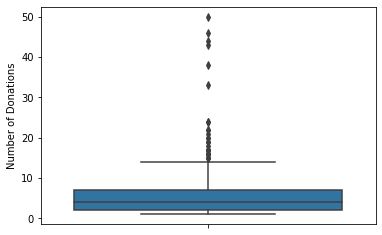

In [80]:
sns.boxplot(data=train, y='Number of Donations')

In [81]:
train=train[train['Number of Donations']<15]

In [82]:
train=train[train['Months since Last Donation']<30]

In [33]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit

In [8]:
y=train['Made Donation in March 2007']
X=train.drop(labels='Made Donation in March 2007',axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
                                  X, y, test_size=0.2, random_state=42)

In [65]:
default_params={
            'objective':'binary:logistic',
            'max_depth':1,
            'learning_rate':0.3,
            'silent':1.0,
            'min_child_weight':2,
            'subsample':0.8,
            'colsample_bytree':0.6,
            'gamma':0.3
}

n_estimators_range=np.linspace(1,200,5).astype('int')

cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True)

train_scores,test_scores=validation_curve(
                            XGBClassifier(**default_params),
                            X,y,
                            param_name='n_estimators',
                            param_range=n_estimators_range,
                            cv=cv,
                            scoring='f1'
)


C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Unde

Text(0, 0.5, 'f1')

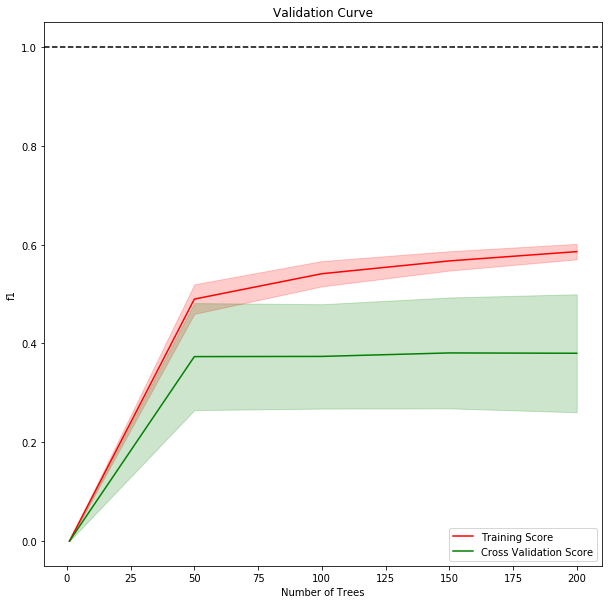

In [66]:
fig=plt.figure(figsize=(10,10))
plt.plot(n_estimators_range,np.mean(train_scores,axis=1),
        label='Training Score',color='r')
plt.plot(n_estimators_range,np.mean(test_scores,axis=1),
        label='Cross Validation Score',color='g')
plt.fill_between(n_estimators_range,
                np.mean(train_scores,axis=1)-np.std(train_scores,axis=1),
                np.mean(train_scores,axis=1)+np.std(train_scores,axis=1),
                 alpha=0.2,color='r')
plt.fill_between(n_estimators_range,
                np.mean(test_scores,axis=1)-np.std(test_scores,axis=1),
                np.mean(test_scores,axis=1)+np.std(test_scores,axis=1),
                 alpha=0.2,color='g')
                                  
plt.axhline(y=1,color='k',ls='dashed')
plt.legend(loc='best')
plt.title('Validation Curve')
plt.xlabel('Number of Trees')
plt.ylabel('f1')

In [67]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='r', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, color='r', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='CrossValidation Score', color='g', marker='o')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='g', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('F-measure')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()

In [68]:
def conf_matrix(clf,X_train,y_train,X_test,y_test):

    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    sns.heatmap(confusion_matrix(y_pred,y_test),
                annot=True,annot_kws={"size": 16},
               xticklabels=['Did not Donate','Donated'],
                yticklabels=['Did not Donate','Donated'])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')


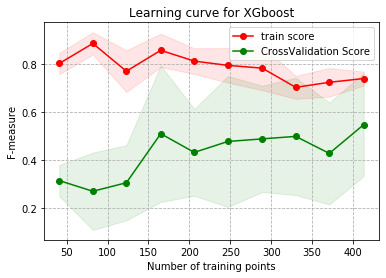

In [71]:
cv = StratifiedKFold(n_splits=10,random_state=None, shuffle=True)
train_sizes, train_scores, test_scores = learning_curve(
              estimator= XGBClassifier(**default_params) , X= X_train, y = y_train,
                train_sizes=np.arange(0.1,1.1,0.1), cv= cv,  scoring='precision')
plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for XGboost')


In [75]:
from sklearn.model_selection import cross_validate   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

In [ ]:
param_test1 = {
 'max_depth':[i/10 for i in range(1,10,1)],
 
 
}
cv = StratifiedKFold(n_splits=10,random_state=None, shuffle=True)
gsearch1 = GridSearchCV(estimator = XGBClassifier
                        ( learning_rate =0.1, 
                         n_estimators=1000, 
                         max_depth=1,
                         min_child_weight=6, 
                         gamma=0.5, 
                         subsample=0.7, 
                         colsample_bytree=0.1,
                         objective= 'binary:logistic', 
                         nthread=4, 
                         scale_pos_weight=1, 
                         seed=27), 
 param_grid = param_test1, 
            scoring='f1',
            n_jobs=4,
            iid=False, 
            cv=cv,
            return_train_score=False)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_

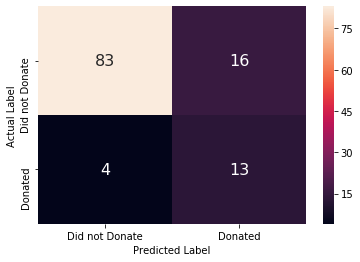

In [101]:
 estimator = (XGBClassifier
                        (learning_rate =0.1, 
                         n_estimators=1000, 
                         max_depth=1,
                         min_child_weight=6, 
                         gamma=0.5, 
                         subsample=0.7, 
                         colsample_bytree=0.1,
                         objective= 'binary:logistic', 
                         nthread=4, 
                         scale_pos_weight=1, 
                         seed=27))
conf_matrix(estimator,X_train,y_train,X_test,y_test)

In [48]:
from sklearn.ensemble         import BaggingClassifier

In [50]:
SEED   = 97
scale  = False 
minmax = False
norm   = False
nointercept = False
engineering = True

N_CLASSES = 2

In [55]:
StatifiedCV = StratifiedKFold( 
                              n_splits      = 10, 
                              shuffle      = True, 
                              random_state = SEED)

In [57]:
import random
random.seed(SEED)

clf = BaggingClassifier(base_estimator     = None, 
                        n_estimators       = 10, 
                        max_samples        = 1.0, 
                        max_features       = 1.0, 
                        bootstrap          = True, 
                        bootstrap_features = False, 
                        
                        oob_score          = False, 
                        warm_start         = False, 
                        n_jobs             = -1, 
                        random_state       = SEED, 
                        verbose            = 0)

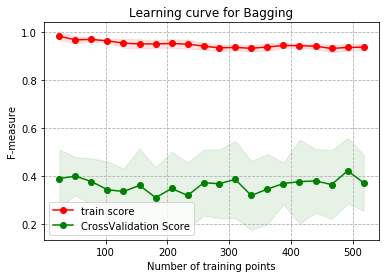

In [66]:
train_sizes, train_scores, test_scores = learning_curve(
              estimator= clf , X= X, y = y,
                train_sizes=np.arange(0.05,1.05,0.05), cv= StatifiedCV,  scoring='f1',n_jobs=1)
plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for Bagging')


In [16]:
from sklearn.linear_model import LogisticRegression

C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

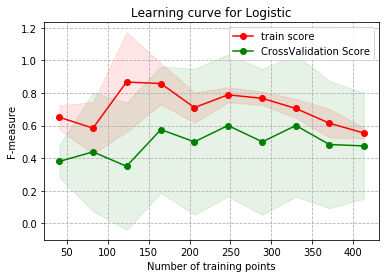

In [19]:
cv = StratifiedKFold(n_splits=10,random_state=None, shuffle=True)
train_sizes, train_scores, test_scores = learning_curve(
              estimator= LogisticRegression() , X= X_train, y = y_train,
                train_sizes=np.arange(0.1,1.1,0.1), cv= cv,  scoring='precision')
plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for Logistic')


In [22]:
from sklearn.metrics import confusion_matrix

In [27]:
y_train.head()

437    0
63     1
208    1
60     1
15     1
Name: Made Donation in March 2007, dtype: int64

In [118]:
#for measuring training time
from time import time 
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, pos_label='H'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
   train_classifier(clf, X_train, y_train)

    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print (f1, acc)
    print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))

    f1, acc = predict_labels(clf, X_test, y_test)
    print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

SyntaxError: invalid syntax (<ipython-input-118-5e84529ac355>, line 45)